In [3]:
import numpy as np
import sys
import os
import textwrap
from datetime import datetime as dt
import calendar
import texts as tx

In [6]:
import sys,time

string = """ H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping"""

typing_speed = 390

def slow_type(t):
    for l in t:
        sys.stdout.write(l)
        sys.stdout.flush()
        time.sleep(10.0/typing_speed)
    print('\n')

slow_type(string)

 H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping



In [ ]:
STAFF = [
    'diego',
    'maike',
    'grogu',
    'sina',
    'taro',
    'grace',
    'anna bendel',
    'charlotte',
    'isabelle',
    'jessica',
    'anna',
    'juliana',
    'lea',
    'lino',
    'maja',
    'margaretha',
    'marilin',
    'matthias',
    'micaela',
    'mona',
    'anisa',
    'rieka',
    'sabina',
    'sandra',
    'santiago',
    'therese',
    'utz',
    'yunus',
    'veronica',
    'karolina',
    'imer'
]


def is_not_int(var):
    try:
        int(var)
        return False
    except:
        return True

def wich_one(name):
    hit =[]
    for s in STAFF:
        if name in s:
            hit.append(s)

    if len(hit) > 1:
        print('wich one?')
        for i, s in enumerate(hit):
            print(f'{i+1}. {s}')
            
        result = input('--> select: ')
        
        while is_not_int(result):
            result = input('--> select: ')

        return hit[int(result) - 1]

    else:
        return name


file_path = []

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            if 'WHOLE' in filename:
                filename = os.path.join(root, filename)
                if int(filename[7:11]) == 2024:
                    if int(filename[12:14]) >= 9:
                        file_path.append(filename)
                    elif int(filename[12:14]) == 8 and int(filename[15:17]) >= 17:
                        file_path.append(filename)
                elif int(filename[7:11]) >= 2025:
                    file_path.append(filename)


staff_tip = [[] for i in range(len(STAFF))]
staff_date = [[] for i in range(len(STAFF))]


for file in file_path:
    f = open(file)
    jData = json.loads(f.read())

    try:
        for i, staff in enumerate(jData['staff']):
            staff_tip[STAFF.index(staff)].append(jData['tip'][i])
            staff_date[STAFF.index(staff)].append(jData['timestamp'])

    except KeyError:
        print('skip file', file[7:])

for i, j in enumerate(staff_tip):
    print(staff_tip[i], staff_date[i])

In [ ]:
def sorterkey(line):
    year = line[7:11]
    month = line[12:14]
    day = line[15:17]
    
    return (int(year), int(month), int(day))

file_path = []

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            file_path.append(os.path.join(root, filename))

for file in sorted(file_path, key=sorterkey):
    f = open(file)
    jData = json.loads(f.read())

    m = 9
    d = 14

    day, month, year = jData['timestamp'].split('-', 1)[0].split('.')
    if int(year) == 2024 and int(month) >= m:
        if int(month) == m and int(day) >= d:
            pass
        elif int(month) == m:
            continue
    else:
        continue

    for i, j in jData.items():
        print(i, j)

    if 'staff' in jData.keys():
        print(jData['staff'])
        if input('continue?') == 'yes':
            continue
        else:
            pass

    staff = []
    i = 0
    
    while True:
        i += 1
        if i > len(jData['hour']):
            break
            
        result = wich_one(input(f"{i}. {jData['hour'][i-1]}"))

        if result == 'noname':
            staff = 'false'
            break
            
        elif result not in STAFF:
            print('not in list.')
            i -= 1
        
        else:
            staff.append(str(result))

    jData['staff'] = staff

    with open(file, 'w+') as ff:
        json.dump(jData, ff)

In [217]:
import numpy as np
import os
from datetime import datetime as dt
import calendar
import warnings
import subprocess
import json
from urllib import request
import socket
import matplotlib.pyplot as plt

from harvest_func import abort, git_update, fcalctip, is_connected


warnings.filterwarnings("ignore", category=RuntimeWarning)

l_ignore = ['LOG', 'checkpoint', 'DS', 'edited', 'TextIOWrapper']

def sorterkey(line):
    year = line[7:11]
    month = line[12:14]
    day = line[15:17]
    time = line[22:27].replace('-', '')
    
    return (int(year), int(month), int(day), int(time))


def calculate_statistic(files):
    d_return = {
        "date": [],
        "weekday": [],
        "time": [],
        "hour": [],
        "ratio": [],
        "total": [],
        "bar": [],
        "card": [],
        "holiday": [],
    }
    for file in files:
        try:
            f = open(file)
            jData = json.loads(f.read())
        except IndexError:
            print(file)

        s_date, s_time = jData['timestamp'].split('-', 1)
        d_return["date"].append(s_date)
        d_return["weekday"].append(dt.strptime(s_date, "%d.%m.%Y").weekday())

        if int(s_time[:2]) > 17:
            d_return["time"].append('PM')
        else:
            d_return["time"].append('AM')

        d_return["hour"].append(jData["hour"])
        
        d_return["ratio"].append(float(jData["ratio"]))

        d_return["total"].append(float(jData["sum"]))

        try:
            d_return["bar"].append(float(jData["bar"]))
        except ValueError:
            d_return["bar"].append(jData["ratio"])

        try:
            d_return["card"].append(float(jData["card"]))
        except ValueError:
            d_return["card"].append(jData["ratio"])

        d_return["holiday"].append(jData["holiday"])
        
        f.close()

    d_return["bar"] = list(filter(lambda item: item != 'None', d_return["bar"]))
    d_return["card"] = list(filter(lambda item: item != 'None', d_return["card"]))

    return d_return

In [225]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [304]:
path = './json/'

def txtmd(string):
    return string + '  \n'


text = list()

flag = True
files_whole = []
files_half = []
l_dict = ['whole', 'half']

i = 0
for dirpath, dirnames, filenames in os.walk(path):
    for f in filenames:
        if not any(s in f for s in l_ignore):
            if 'whole' in f.lower():
                files_whole.append(os.path.join(dirpath, f))
            else:
                files_half.append(os.path.join(dirpath, f))
                
            flag = False

files_whole = sorted(files_whole, key=sorterkey)
files_half = sorted(files_half, key=sorterkey)

d_whole = calculate_statistic(files_whole)
d_half = calculate_statistic(files_half)
d_all = [d_whole, d_half]

ltx_ratio = ' $/ \\frac{\\textup{€}}{\\textup{h}}$'
ltx_euro = ' $/$ €'

text.append(txtmd('# Overview'))

text.append(txtmd('|| whole | half |'))
text.append(txtmd('|---|---|---|'))

for theme in ['total', 'ratio', 'bar', 'card']:
    if theme == 'bar':
        keyword = 'cash'
    else:
        keyword = theme

    if keyword == 'ratio':
        keyword += ltx_ratio
    else:
        keyword += ltx_euro
    row = '|' + keyword + '|'
    for d in d_all:
        if theme in ['card', 'bar']:
            d_temp = [i for i in d[theme] if i != 0]
        else:
            d_temp = d[theme]
            
        row += f'${np.mean(d_temp):6.3f} \\pm {np.std(d_temp):6.3f}$|'

    text.append(txtmd(row))

with open('./test.md', 'w') as f:
    f.writelines(text)

with open('./test.md', 'r') as f:
    content = f.read()

display(Markdown(content))

# Overview  
|| whole | half |  
|---|---|---|  
|total $/$ €|$184.570 \pm 52.605$|$109.073 \pm 31.330$|  
|ratio $/ \frac{\textup{€}}{\textup{h}}$|$ 4.416 \pm  0.774$|$ 5.129 \pm  1.119$|  
|cash $/$ €|$78.205 \pm 24.453$|$45.165 \pm 19.563$|  
|card $/$ €|$108.877 \pm 37.300$|$57.759 \pm 26.779$|  


In [306]:
text = list()

text.append(txtmd('# Total / Ratio'))
text.append(txtmd('## Whole day'))

text.append(txtmd('||total'+ltx_euro+'|ratio'+ltx_ratio+'|timestamp|holiday|'))
text.append(txtmd('|---|---|---|---|---|'))

for i, d in enumerate(d_all):
    top = sorted(zip(d["total"], d["ratio"], d["date"], d["time"], d["holiday"]), reverse=True)[:3]
    for j in range(3):
        wkday = dt.strptime(top[j][2], '%d.%m.%Y').strftime('%a')
        if top[j][4].capitalize() == 'False':
            temp_holiday = 'False'
        else:
            temp_holiday = top[j][4]

        row = f'|{j+1}"|'
        row += f'{top[j][0]:6.2f}|'
        row += f'{top[j][1]:6.2f}|'
        row += f'{top[j][2]:10} {wkday} '
        row += f'{top[j][3]}|'
        row += f'{temp_holiday}|'

        text.append(txtmd(row))

with open('./test.md', 'w') as f:
    f.writelines(text)

with open('./test.md', 'r') as f:
    content = f.read()

display(Markdown(content))

# Total / Ratio  
## Whole day  
||total $/$ €|ratio $/ \frac{\textup{€}}{\textup{h}}$|timestamp|holiday|  
|---|---|---|---|---|  
|1"|334.35|  6.52|22.10.2023 Sun PM|False|  
|2"|322.02|  6.05|13.08.2023 Sun PM|False|  
|3"|313.99|  5.02|15.09.2024 Sun PM|False|  
|1"|186.83|  6.13|03.03.2024 Sun AM|False|  
|2"|184.50|  6.10|13.08.2023 Sun AM|False|  
|3"|180.09|  7.50|28.04.2024 Sun AM|False|  


In [283]:
'low'.capitalize()

'Low'

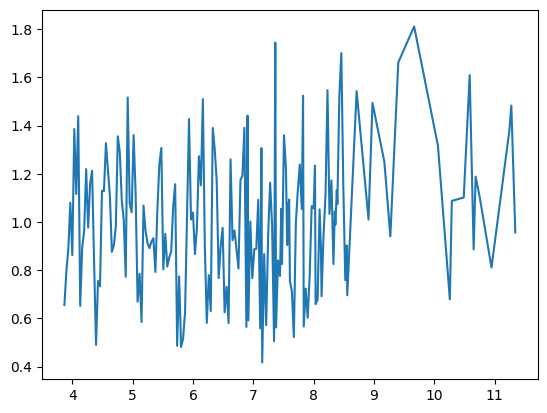

In [224]:
date_year = [i.rsplit('.', 1) for i in d_whole['date']]

x = []
y = []
mean = np.mean(d_whole['total'])
for i, d in enumerate(d_whole['date']):
    day, month, year = d.split('.')
    day, month, year = int(day), int(month), int(year)
    
    this_year = dt(year=year, month=1, day=1)
    next_year = dt(year=year+1, month=1, day=1)

    part = dt(year=year, month=month, day=day) - this_year
    whole = next_year - this_year
    x.append(part / whole * 12)
    y.append(d_whole['total'][i]/ mean)

x, y = zip(*sorted(zip(x, y)))

plt.plot(x, y)

In [197]:
'a.b.c'.rsplit('.', 1)

['a.b', 'c']